In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
import scipy
import copy
import cvxpy
import os

In [21]:
signals_aef = pd.read_csv('../Data/signals_df_aef_mef_storagebefore_noevbase_20240208.csv', index_col=0)
signals_aef_co2 = pd.read_csv('../Data/signals_df_aef_mef_storagebefore_noevbase_co2price_01dolperkg_20240208.csv', index_col=0)
signals_mrmef = pd.read_csv('../Data/signals_df_mrmef_storagebefore_noevbase_20240208.csv', index_col=0)
signals_mrmef_co2 = pd.read_csv('../Data/signals_df_mrmef_storagebefore_noevbase_co2price_01dolperkg_20240208.csv', index_col=0)

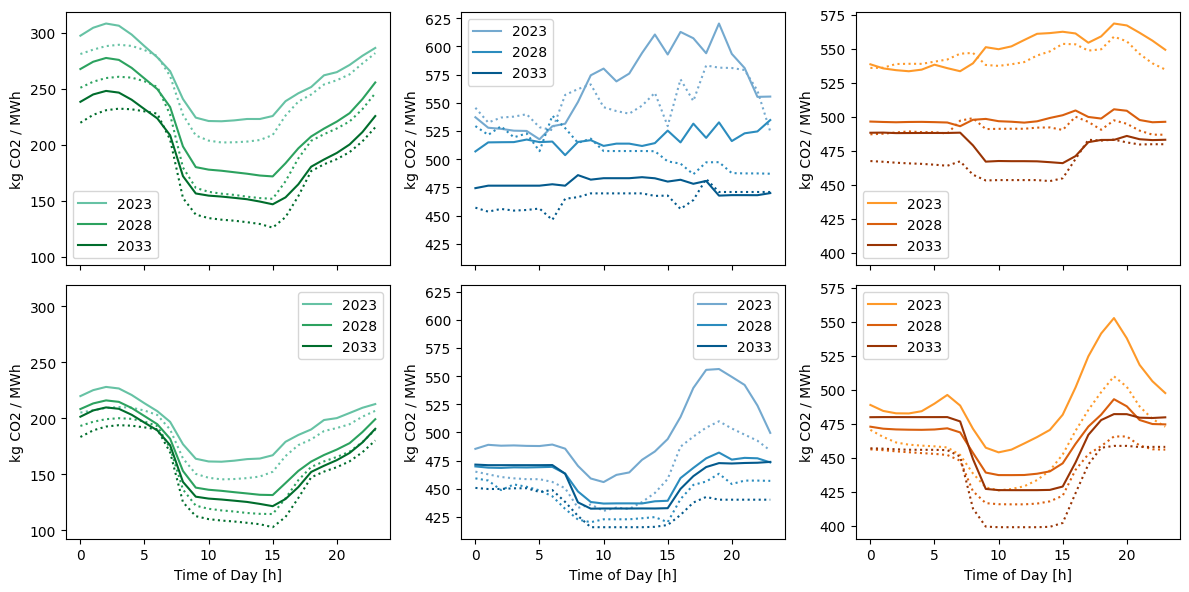

In [22]:
colours1 = ['#66c2a4', '#2ca25f', '#006d2c']
colours2 = ['#74a9cf', '#2b8cbe', '#045a8d']
colours3 = ['#fe9929', '#d95f0e', '#993404']

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey='col')#, sharey=True)
for j, year in enumerate([2023, 2028, 2033]):
    axes[0, 0].plot(signals_aef['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[0, 0].plot(signals_aef['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')#, label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[0, 2].plot(signals_mrmef['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[0, 2].plot(signals_mrmef['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
    axes[1, 0].plot(signals_aef_co2['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[1, 0].plot(signals_aef_co2['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')
    axes[1, 1].plot(signals_aef_co2['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[1, 1].plot(signals_aef_co2['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
for j in range(3):
    axes[1, j].set_xlabel('Time of Day [h]')
    for i in range(2):
        axes[i, j].set_ylabel('kg CO2 / MWh')
        axes[i, j].legend(fontsize=10)
plt.tight_layout()
plt.savefig('../Figures/signals_all_20240216.pdf', bbox_inches='tight')
plt.savefig('../Figures/signals_all_20240216.png', bbox_inches='tight')
plt.show()

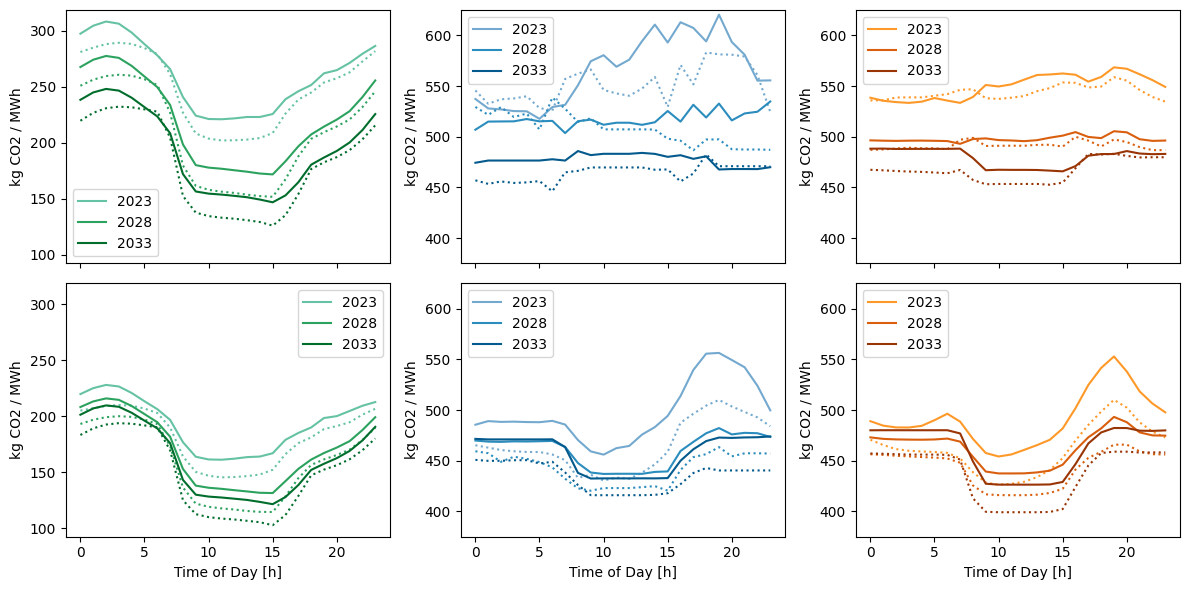

In [23]:
colours1 = ['#66c2a4', '#2ca25f', '#006d2c']
colours2 = ['#74a9cf', '#2b8cbe', '#045a8d']
colours3 = ['#fe9929', '#d95f0e', '#993404']

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey='col')#, sharey=True)
for j, year in enumerate([2023, 2028, 2033]):
    axes[0, 0].plot(signals_aef['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[0, 0].plot(signals_aef['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')#, label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[0, 2].plot(signals_mrmef['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[0, 2].plot(signals_mrmef['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
    axes[1, 0].plot(signals_aef_co2['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[1, 0].plot(signals_aef_co2['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')
    axes[1, 1].plot(signals_aef_co2['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[1, 1].plot(signals_aef_co2['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta10000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
    
axes[0, 1].set_ylim([375, 625])
axes[0, 2].set_ylim([375, 625])

for j in range(3):
    axes[1, j].set_xlabel('Time of Day [h]')
    for i in range(2):
        axes[i, j].set_ylabel('kg CO2 / MWh')
        axes[i, j].legend(fontsize=10)
plt.tight_layout()
plt.savefig('../Figures/signals_all_20240216_v2.pdf', bbox_inches='tight')
plt.savefig('../Figures/signals_all_20240216_v2.png', bbox_inches='tight')
plt.show()

In [20]:
# signals_mrmef_co2

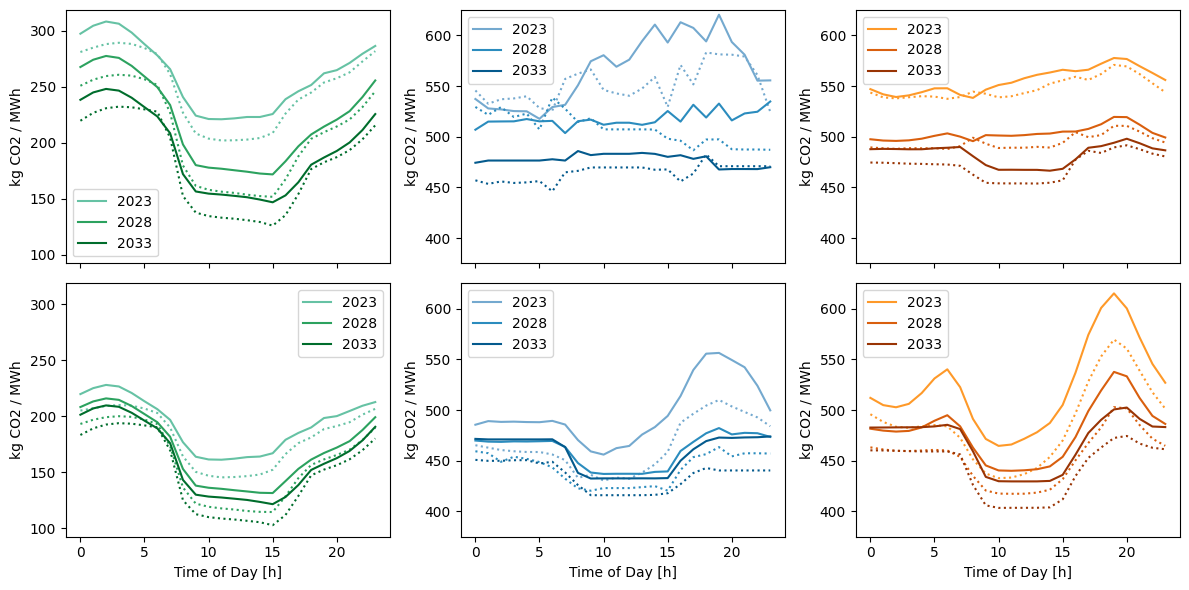

In [24]:
colours1 = ['#66c2a4', '#2ca25f', '#006d2c']
colours2 = ['#74a9cf', '#2b8cbe', '#045a8d']
colours3 = ['#fe9929', '#d95f0e', '#993404']

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True, sharey='col')#, sharey=True)
for j, year in enumerate([2023, 2028, 2033]):
    axes[0, 0].plot(signals_aef['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[0, 0].plot(signals_aef['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')#, label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[0, 1].plot(signals_aef['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[0, 2].plot(signals_mrmef['MRMEF_delta20000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[0, 2].plot(signals_mrmef['MRMEF_delta20000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
    axes[1, 0].plot(signals_aef_co2['AEF_weekday_'+str(year)], color=colours1[j], label=str(year))
    axes[1, 0].plot(signals_aef_co2['AEF_weekend_'+str(year)], color=colours1[j], linestyle=':')
    axes[1, 1].plot(signals_aef_co2['MEF_weekday_'+str(year)], color=colours2[j], label=str(year))
    axes[1, 1].plot(signals_aef_co2['MEF_weekend_'+str(year)], color=colours2[j], linestyle=':')
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta20000_startyear'+str(year)+'_5yearsahead_weekday'], color=colours3[j], label=str(year))
    axes[1, 2].plot(signals_mrmef_co2['MRMEF_delta20000_startyear'+str(year)+'_5yearsahead_weekend'], color=colours3[j], linestyle=':')
    
axes[0, 1].set_ylim([375, 625])
axes[0, 2].set_ylim([375, 625])

for j in range(3):
    axes[1, j].set_xlabel('Time of Day [h]')
    for i in range(2):
        axes[i, j].set_ylabel('kg CO2 / MWh')
        axes[i, j].legend(fontsize=10)
plt.tight_layout()
plt.savefig('../Figures/signals_all_20240216_v3.pdf', bbox_inches='tight')
plt.savefig('../Figures/signals_all_20240216_v3.png', bbox_inches='tight')
plt.show()

In [25]:
name = 'AEF'; yearname='2023'
print(name)
for yearname in ['2023', '2033']:
    print(yearname)
    print('Weekday:', np.round(signals_aef[name+'_weekday_'+yearname].min()), np.round(signals_aef[name+'_weekday_'+yearname].max()))
    print('Weekend:', np.round(signals_aef[name+'_weekend_'+yearname].min()), np.round(signals_aef[name+'_weekend_'+yearname].max()))      

AEF
2023
Weekday: 221.0 308.0
Weekend: 202.0 289.0
2033
Weekday: 147.0 248.0
Weekend: 126.0 232.0


In [26]:
name = 'AEF'; yearname='2023'
print(name)
for yearname in ['2023', '2033']:
    print(yearname)
    print('Weekday:', np.round(signals_aef_co2[name+'_weekday_'+yearname].min()), np.round(signals_aef_co2[name+'_weekday_'+yearname].max()))
    print('Weekend:', np.round(signals_aef_co2[name+'_weekend_'+yearname].min()), np.round(signals_aef_co2[name+'_weekend_'+yearname].max()))      

AEF
2023
Weekday: 161.0 228.0
Weekend: 145.0 210.0
2033
Weekday: 121.0 210.0
Weekend: 103.0 194.0
